## Dependências

In [1]:
# import packages
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting data
import geobr
states = geobr.read_state(year=2019)
import warnings
warnings.filterwarnings('ignore')

c:\Python\Python396\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


## Brazil Corona Data

In [2]:
# import directly from GitHub
corona_df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv").fillna(0.0)

# change date column to datetime format
corona_df['date'] = pd.to_datetime(corona_df['date'])

# print all available columns
#print(corona_df.columns)

In [3]:
corona_df_brazil = corona_df.query("state == 'TOTAL'")[['date', 'state', 'newDeaths', 'newCases', 'totalCases', 'deaths', 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second', 'vaccinated_per_100_inhabitants', "deaths_per_100k_inhabitants"]]
corona_df_brazil1 = corona_df_brazil.groupby([corona_df_brazil['date'].dt.strftime('%y-%m'), 'state'])[["newDeaths", "newCases"]].sum()
corona_df_brazil2 = corona_df_brazil.groupby([corona_df_brazil['date'].dt.strftime('%y-%m'), 'state'])[["vaccinated_per_100_inhabitants"]].max()
corona_df_brazil_month = pd.merge(corona_df_brazil1, corona_df_brazil2, on=["date", "state"]).reset_index().iloc[0:34]
corona_df_brazil_month.head()

,date,state,newDeaths,newCases,vaccinated_per_100_inhabitants
0,20-02,TOTAL,0,2,0.0
1,20-03,TOTAL,202,5822,0.0
2,20-04,TOTAL,5778,81297,0.0
3,20-05,TOTAL,23385,428975,0.0
4,20-06,TOTAL,30416,896462,0.0


## Per State

In [4]:
# Total
corona_df_total = corona_df.query("state != 'TOTAL'")[['date', 'state', 'newDeaths', 'newCases', 'totalCases', 'deaths', 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second', 'vaccinated_per_100_inhabitants', "deaths_per_100k_inhabitants"]]
corona_df_total = corona_df_total.sort_values(['date', 'state'])

In [5]:
corona_df_total_month1 = corona_df_total.groupby([corona_df_total['date'].dt.strftime('%y-%m'), 'state'])[["newDeaths", "newCases"]].sum()
corona_df_total_month2 = corona_df_total.groupby([corona_df_total['date'].dt.strftime('%y-%m'), 'state'])[["vaccinated_per_100_inhabitants"]].max()
corona_df_total_month3 = corona_df_total.groupby([corona_df_total['date'].dt.strftime('%y-%m'), 'state'])[["deaths_per_100k_inhabitants"]].max()
corona_df_total_month = pd.merge(corona_df_total_month1, corona_df_total_month2, on=["date", "state"])
corona_df_total_month = pd.merge(corona_df_total_month, corona_df_total_month3, on=["date", "state"])
corona_df_total_month

newDeaths  newCases  vaccinated_per_100_inhabitants  \
date  state                                                        
20-02 SP             0         2                         0.00000   
20-03 AC             0        42                         0.00000   
      AL             1        18                         0.00000   
      AM             3       175                         0.00000   
      AP             0        10                         0.00000   
...                ...       ...                             ...   
23-01 RS           208     45220                        86.46229   
      SC            32     15329                        88.00576   
      SE            15      1102                        87.46502   
      SP           767     74127                        94.03006   
      TO            12      3690                        74.83759   

             deaths_per_100k_inhabitants  
date  state                               
20-02 SP                         0.00000  
20-03 AC                         0.00000  
      AL                         0.02996  
      AM                         0.07238  
      AP                         0.00000  
...                                  ...  
23-01 RS                       366.66189  
      SC                       315.64088  
      SE                       282.63850  
      SP                       388.02633  
      TO                       268.30003  

[946 rows x 4 columns]

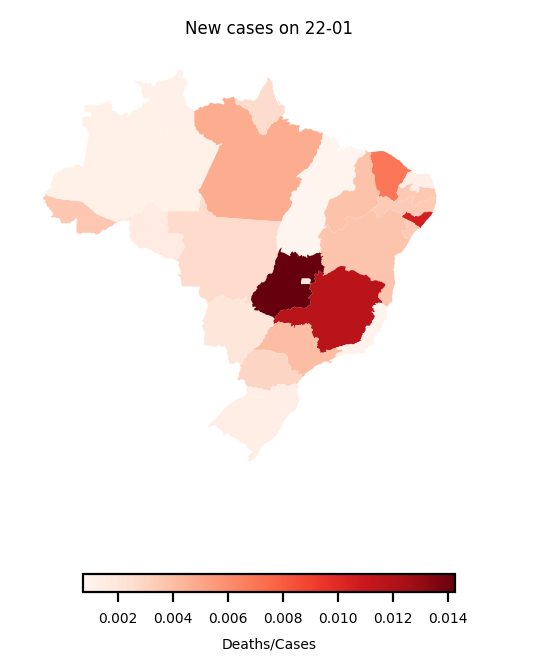

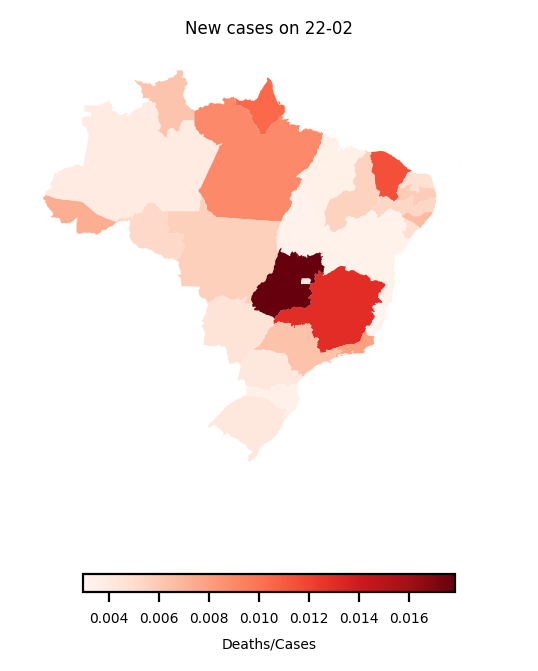

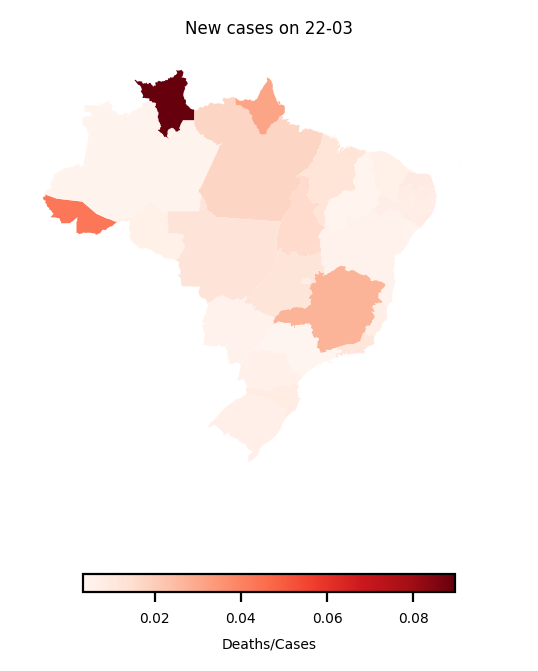

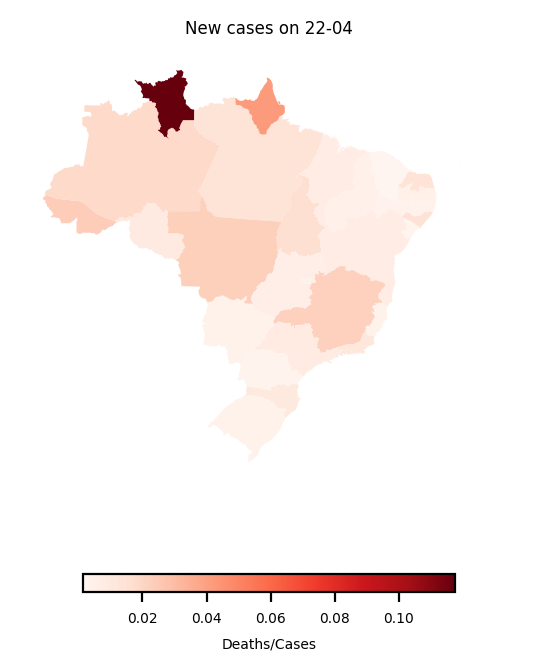

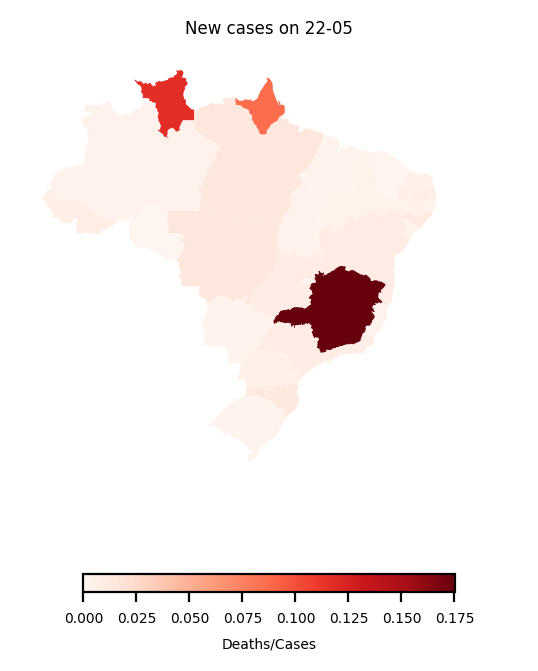

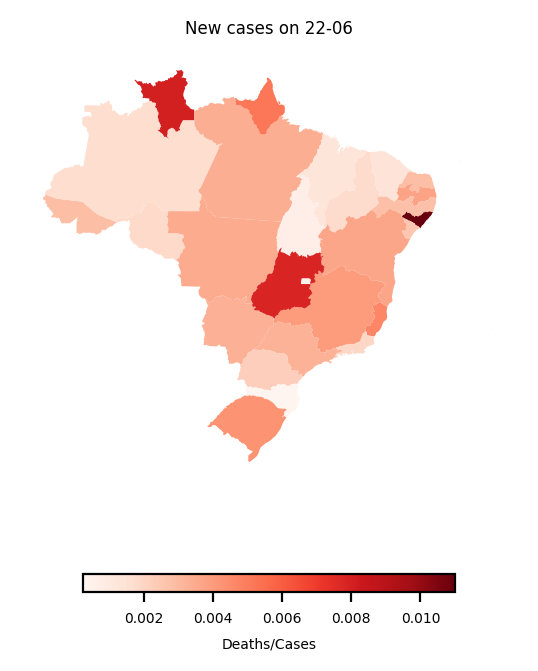

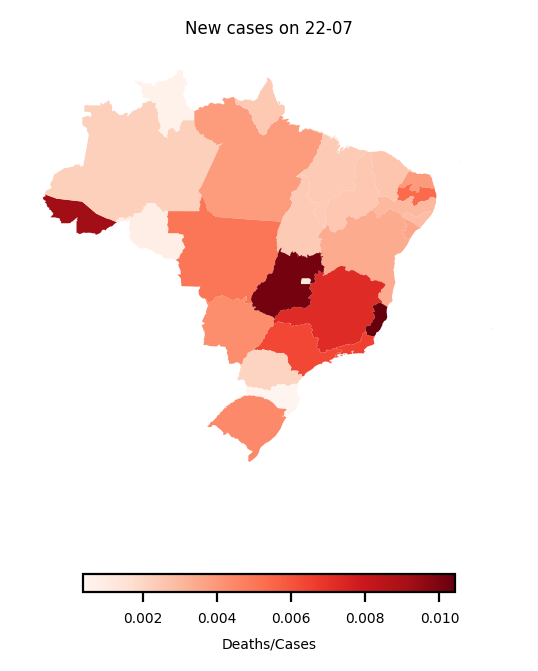

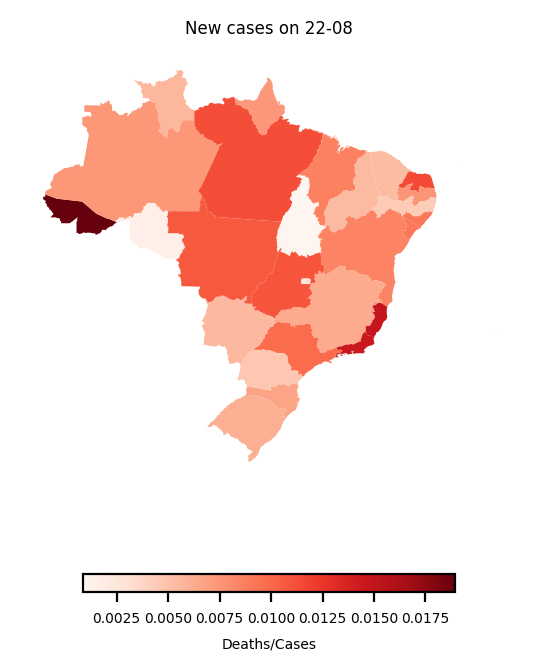

In [6]:
col = "deaths_per_100k_inhabitants"
for i in range(8):
    month = f"22-0{i+1}"
    corona_month = corona_df_total_month.xs(month, level="date").reset_index()
    corona_month['deaths_per_cases'] = corona_month["newDeaths"]/corona_month["newCases"]
    corona_month

    states["abbrev_state"] = states["abbrev_state"].str.lower()
    corona_month["state"] = corona_month["state"].str.lower()
    # join the databases
    corona_states = states.merge(corona_month, how="left", left_on="abbrev_state", right_on="state")

    plt.rcParams.update({"font.size": 5})

    fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

    corona_states.plot(
        column=corona_month['deaths_per_cases'],
        cmap="Reds",
        legend=True,
        legend_kwds={
            "label": "Deaths/Cases",
            "orientation": "horizontal",
            "shrink": 0.6,
        },
        ax=ax,
    )

    ax.set_title(f"New cases on {month}")
    ax.axis("off")

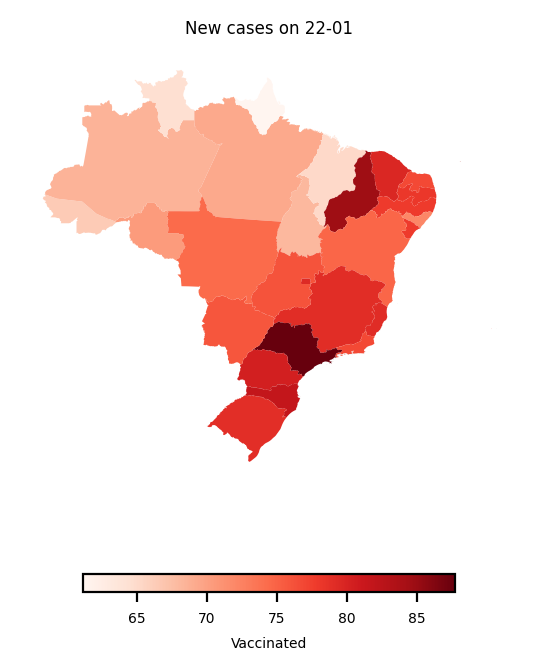

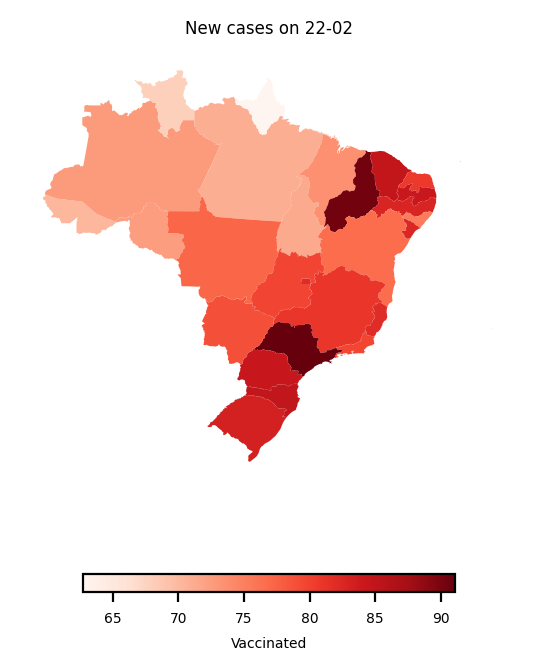

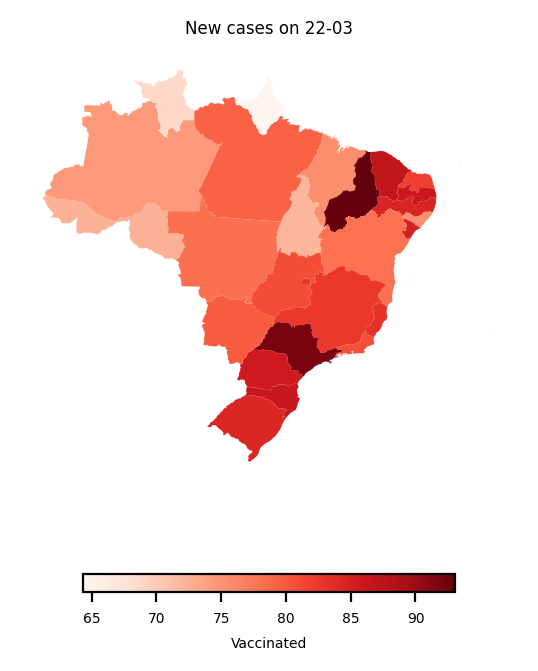

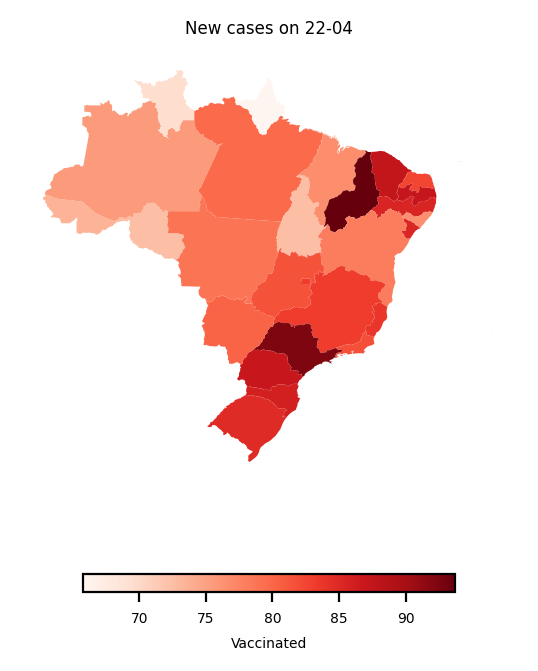

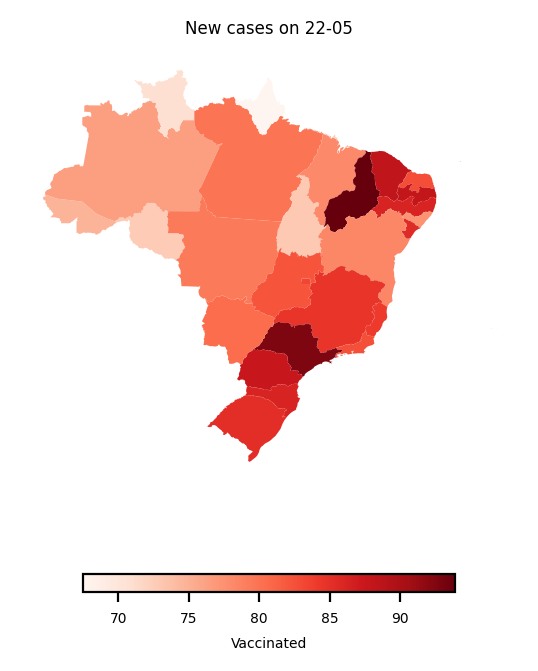

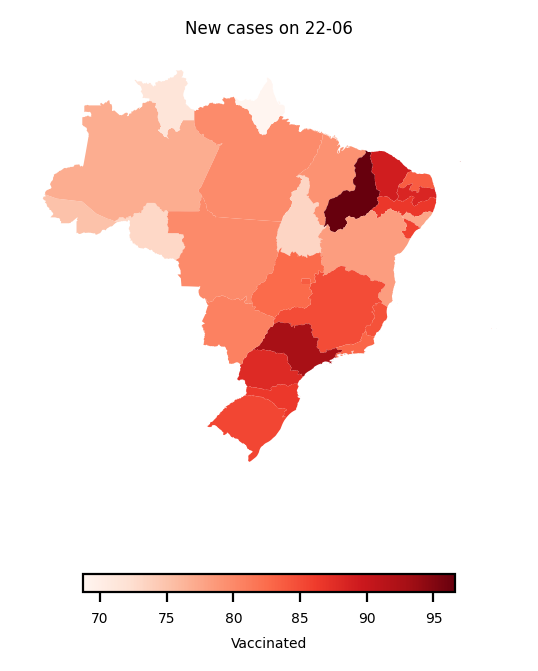

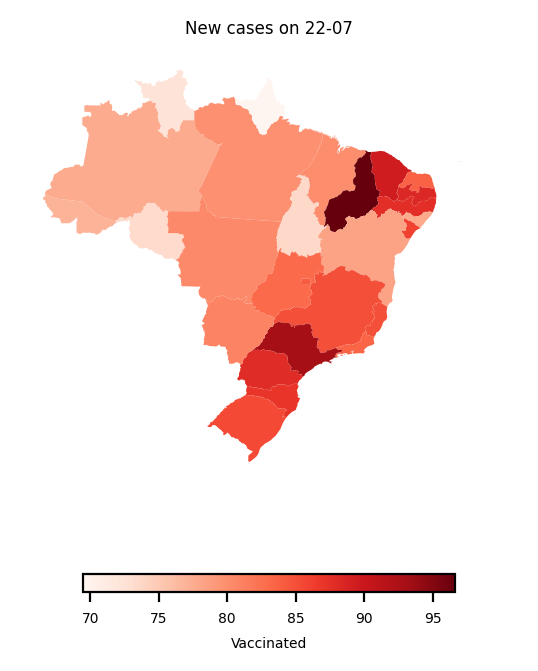

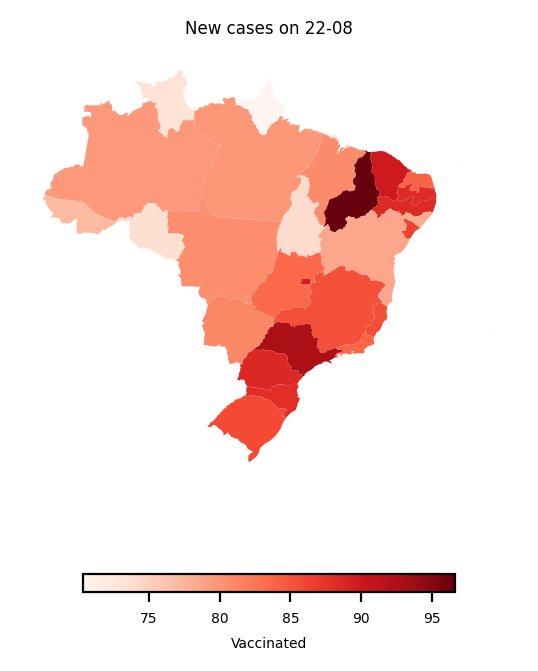

In [8]:
col = "vaccinated_per_100_inhabitants"
for i in range(8):
    month = f"22-0{i+1}"
    corona_month = corona_df_total_month.xs(month, level="date").reset_index()
    corona_month['deaths_per_cases'] = corona_month["newDeaths"]/corona_month["newCases"]
    corona_month

    states["abbrev_state"] = states["abbrev_state"].str.lower()
    corona_month["state"] = corona_month["state"].str.lower()
    # join the databases
    corona_states = states.merge(corona_month, how="left", left_on="abbrev_state", right_on="state")

    plt.rcParams.update({"font.size": 5})

    fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

    corona_states.plot(
        column=col,
        cmap="Reds",
        legend=True,
        legend_kwds={
            "label": "Vaccinated",
            "orientation": "horizontal",
            "shrink": 0.6,
        },
        ax=ax,
    )

    ax.set_title(f"New cases on {month}")
    ax.axis("off")

## Analysis by month SP

In [9]:

# filter data for Brazil, and show only the specified columns
corona_df_sp = corona_df.query("state == 'SP'")[['date', 'state', 'newDeaths', 'newCases', 'totalCases', 'deaths', 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second']]
corona_df_sp = corona_df_sp.sort_values(['date'])

# create new columns
corona_df_sp['activeCases'] = corona_df_sp['totalCases'] - corona_df_sp['deaths'] - corona_df_sp['recovered']
corona_df_sp['newVaccinated'] = corona_df_sp['vaccinated'].diff()
corona_df_sp['newVaccinated_second'] = corona_df_sp['vaccinated_second'].diff()

In [10]:
corona_df_sp_by_month1 = corona_df_sp.groupby([corona_df_sp['date'].dt.strftime('%y-%m')])[["newDeaths", "newCases"]].sum().reset_index()
corona_df_sp_by_month2 = corona_df_sp.groupby([corona_df_sp['date'].dt.strftime('%y-%m')])[["vaccinated"]].max().reset_index()
corona_df_sp_by_month = pd.merge(corona_df_sp_by_month1, corona_df_sp_by_month2, on="date")
corona_df_sp_by_month.head()

,date,newDeaths,newCases,vaccinated
0,20-02,0,2,0.0
1,20-03,136,2337,0.0
2,20-04,2239,26359,0.0
3,20-05,5240,81000,0.0
4,20-06,7148,171682,0.0


### São Paulo Weather Data

In [11]:
sp_weather_df = pd.read_csv("Sao Paulo,Brazil 2020-02-25 to 2022-11-20.csv")
sp_weather_df = sp_weather_df.groupby([pd.to_datetime(sp_weather_df['datetime']).dt.strftime("%y-%m") ])[['temp']].mean().reset_index()
sp_weather_df.head()

,datetime,temp
0,20-02,20.420000
1,20-03,21.377419
2,20-04,19.760000
3,20-05,17.532258
4,20-06,19.206667


In [12]:
join_temp_covid = pd.merge(corona_df_sp_by_month, sp_weather_df, how="inner", left_on="date", right_on="datetime")[['date', 'newDeaths', 'newCases', 'vaccinated', 'temp']]
join_temp_covid.head()

,date,newDeaths,newCases,vaccinated,temp
0,20-02,0,2,0.0,20.420000
1,20-03,136,2337,0.0,21.377419
2,20-04,2239,26359,0.0,19.760000
3,20-05,5240,81000,0.0,17.532258
4,20-06,7148,171682,0.0,19.206667


### Casos por Temperatura

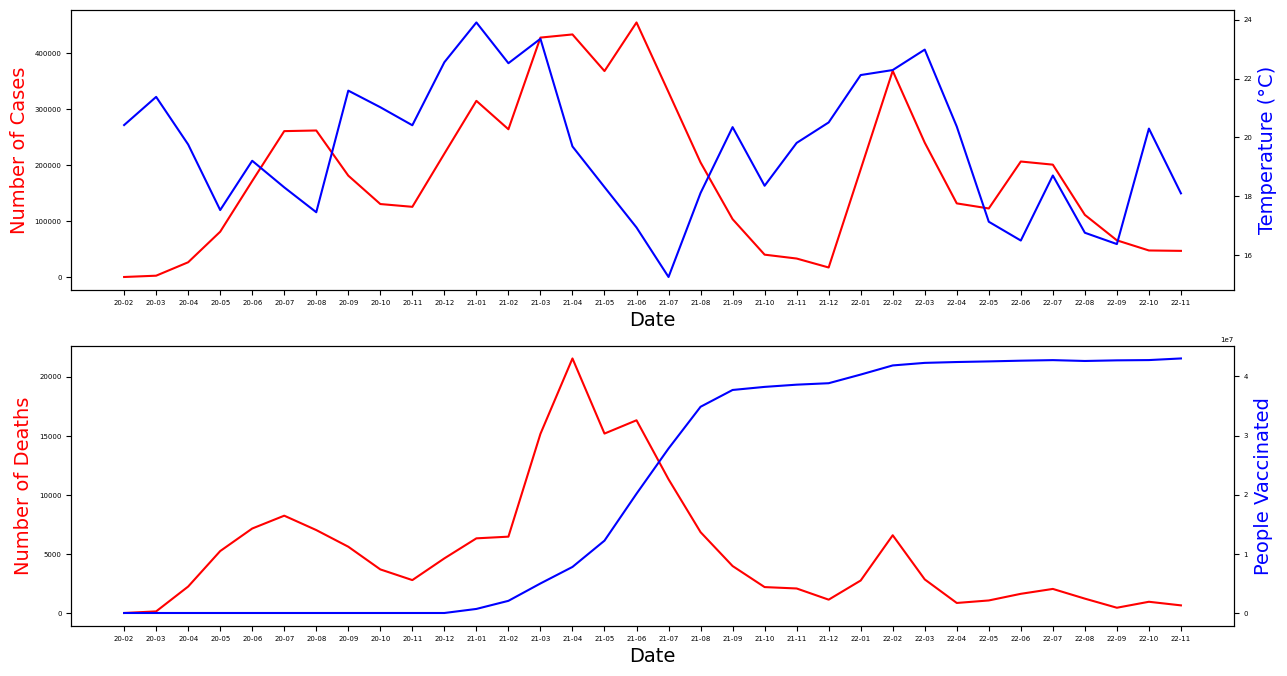

In [13]:
# create figure and axis objects with subplots())
fig, ax = plt.subplots(2, figsize=(15,8))

# make a plot
ax[0].plot(join_temp_covid["date"],
        join_temp_covid["newCases"],
        color="red")
# set x-axis label
ax[0].set_xlabel("Date", fontsize = 14)
# set y-axis label
ax[0].set_ylabel("Number of Cases",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax[0]=ax[0].twinx()
# make a plot with different y-axis using second axis object
ax[0].plot(join_temp_covid["date"], join_temp_covid["temp"],color="blue")
ax[0].set_ylabel("Temperature (°C)",color="blue",fontsize=14)

# make a plot
ax[1].plot(join_temp_covid["date"],
        join_temp_covid["newDeaths"],
        color="red")
# set x-axis label
ax[1].set_xlabel("Date", fontsize = 14)
# set y-axis label
ax[1].set_ylabel("Number of Deaths",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax[1]=ax[1].twinx()
# make a plot with different y-axis using second axis object
ax[1].plot(join_temp_covid["date"], join_temp_covid["vaccinated"],color="blue")
ax[1].set_ylabel("People Vaccinated",color="blue",fontsize=14)

plt.show()


## Impactos da COVID 19
Além dos impactos na saúde e no dia a dia das pessoas, a pandemia de COVID 19 trouxe impactos severos no contexto econômico e de geração de empregos no Brasil. Um cenário crescente de contágios e mortes pela doença, associado a diversas medidas de restrição à movimentação de pessoas e a um profundo cenário de incertezas resultou em graves consequências, de curto e médio prazo. A primeira delas foi sentida no mercado acionário brasileiro, conforme podemos observar abaixo:

In [14]:
!pip install yfinance

You should consider upgrading via the 'c:\python\python396\python.exe -m pip install --upgrade pip' command.


In [15]:
import yfinance as yf
data = yf.download("AMER3.SA", period='1mo', interval='1h')
ibov = yf.download('^BVSP', start = '2016-01-01', end = '2022-12-31', interval = '1wk')
ibov

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01 00:00:00-02:00,43349.0,43349.0,40695.0,40695.0,40695.0,13501700
2016-01-08 00:00:00-02:00,40695.0,41218.0,38459.0,39500.0,39500.0,17129900
2016-01-15 00:00:00-02:00,39494.0,39494.0,37046.0,37717.0,37717.0,17014500
2016-01-22 00:00:00-02:00,37737.0,39100.0,37112.0,38630.0,38630.0,16917700
2016-01-29 00:00:00-02:00,38635.0,41444.0,38596.0,40822.0,40822.0,23189300
...,...,...,...,...,...,...
2022-11-25 00:00:00-03:00,111831.0,112486.0,108378.0,110926.0,110926.0,73420300
2022-12-02 00:00:00-03:00,110926.0,113761.0,106906.0,107245.0,107245.0,70474200
2022-12-09 00:00:00-03:00,107250.0,108566.0,101632.0,103738.0,103738.0,84352100


In [16]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Candlestick(
    x = ibov.index,
    open = ibov.Open,
    close = ibov.Close,
    high = ibov.High,
    low = ibov.Low
))

fig.update_layout(
    xaxis_title='Tempo (semanas)',
    yaxis_title='Índice IBOV'
)

É possível observar que o recuo do Índive Bovespa (IBOV) caiu vertiginosamento no início da pandemia no Brasil (Março de 2020), voltando a patamares de 2017, retrocedento um ciclo de alta que ocorria desde 2016.
Além dos impactos no mercado de ações, os brasileiros sentiram um grande impacto na inflação e na taxa básica de juros, a Selic.

In [20]:
# Lets define a function to import data from their database
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

ipca  = consulta_bc(433)
selic = consulta_bc(1178)

ipca  = ipca.loc['2019-01-01':'2022-12-31']
selic = selic.loc['2019-01-01':'2022-12-31']

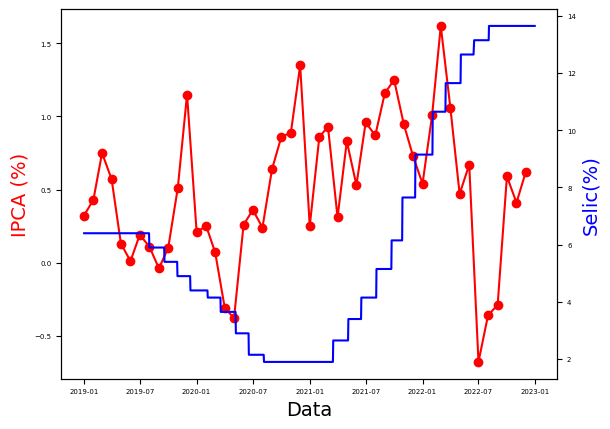

In [21]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()
# Make a plot
ax.plot(ipca.index,
        ipca["valor"],
        color="red",
        marker = "o"
       )
# set x-axis label
ax.set_xlabel("Data", fontsize = 14)
# set y-axis label
ax.set_ylabel("IPCA (%)",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(selic.index,
         selic["valor"],
         color="blue",
        )
ax2.set_ylabel("Selic(%)",color="blue",fontsize=14)
plt.show()

In [22]:
ipca = ipca.reset_index().iloc[13:47]
ipca['data']  = pd.to_datetime(ipca['data'].astype(str), format='%Y-%m-%d').dt.strftime('%y-%m')
selic = selic.reset_index()
selic['data'] = pd.to_datetime(selic['data'].astype(str), format='%Y-%m-%d')
selic = selic.groupby([selic['data'].dt.strftime('%y-%m')])[["valor"]].max().reset_index()[13:47]

A partir dos dados de inflação e juros, é possível perceber que há um crescimento acentuado da inflação ao longo do ano de 2021 e que se mantém alta (em torno de 0,5% a.m.) até meados de 2022. Neste mesmo período, a taxa Selic subiu vertiginosamente para controlar a inflação, chegando a 14% a.a. Deste modo, houve uma acetuada inflação acompanhada por uma alta de juros que aumentou o custo de crédito para os brasileiros, dificultando investimentos e aumentando dívidas de famílias e empresas.

Por fim, mas não menos importante, a pandemia afetou a geração de empregos. Dados encontrados na base de dados do Instituto de Pesquisa Econômica Aplicada (Ipea) mostram que logo no ínicio da pandemia, houve uma redução bastante significativa no saldo de empregos formais criados no Brasil (fonte: Novo Caged)

In [23]:
saldoEmprego = pd.read_csv("ipeadata[19-01-2023-10-59].csv", names = ['Data', 'Saldo'], usecols = [0, 1], header = 0).iloc[1:]
saldoEmprego['Data'] = saldoEmprego['Data'].apply(lambda x: '{0:.2f}'.format(x))
saldoEmprego['Data']  = pd.to_datetime(saldoEmprego['Data'].astype(str), format='%Y.%m').dt.strftime('%y-%m')
saldoEmprego = saldoEmprego.sort_values('Data')
saldoEmprego.head()

,Data,Saldo
1,20-02,198368
2,20-03,-232316
3,20-04,-902317
4,20-05,-352790
5,20-06,-23111


## Covid Brazil Analysis

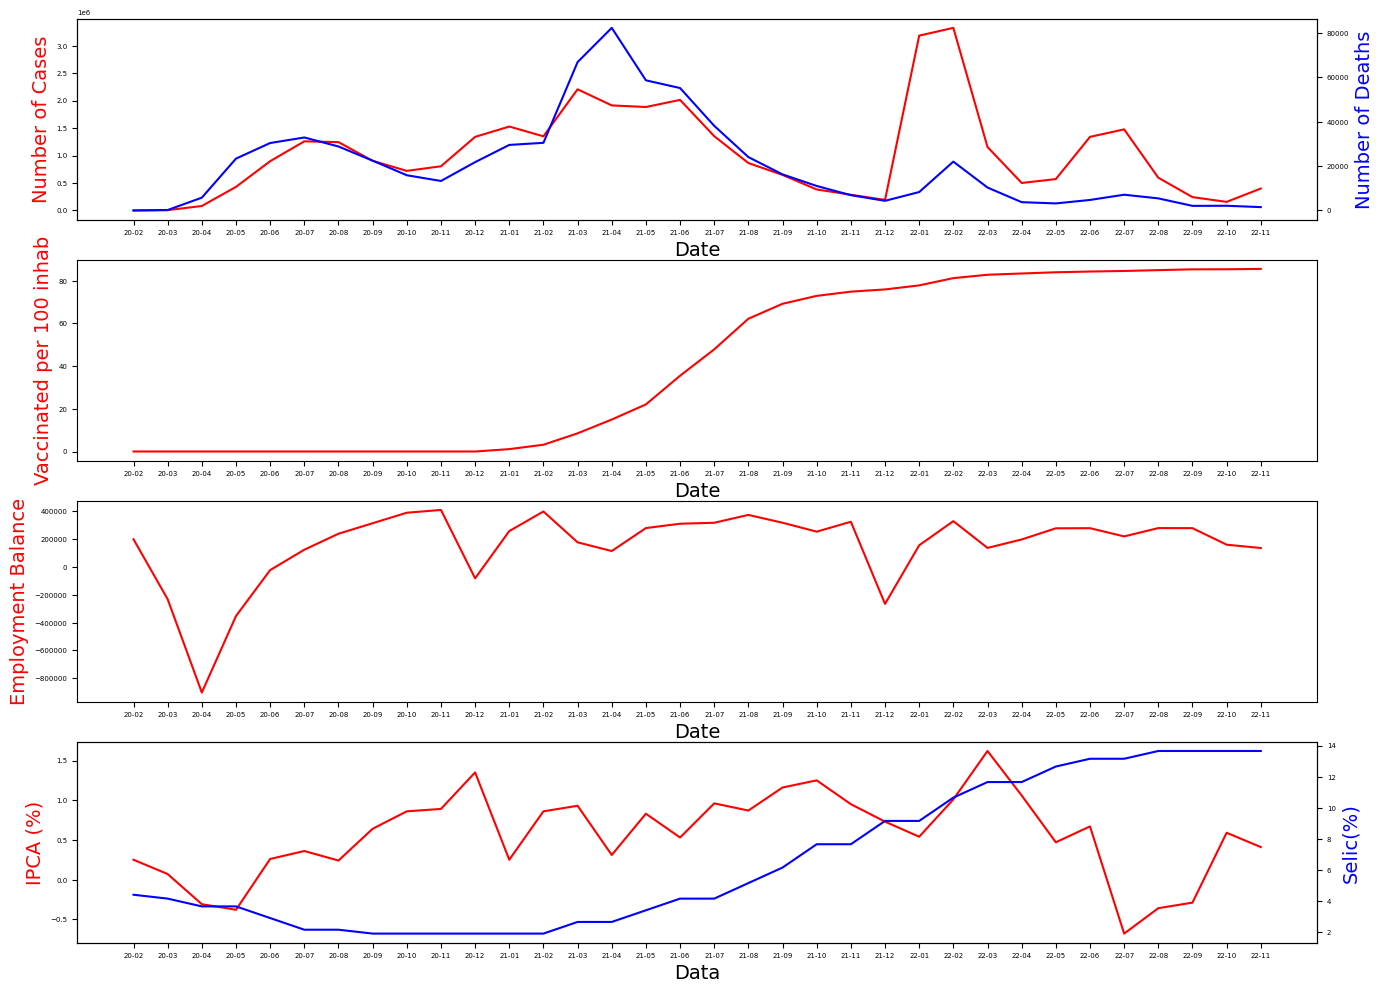

In [54]:
# create figure and axis objects with subplots())
fig, ax = plt.subplots(4, figsize=(16,12))

# make a plot
ax[0].plot(corona_df_brazil_month["date"],
        corona_df_brazil_month["newCases"],
        color="red")
# set x-axis label
ax[0].set_xlabel("Date", fontsize = 14)
# set y-axis label
ax[0].set_ylabel("Number of Cases",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax[0]=ax[0].twinx()
# make a plot with different y-axis using second axis object
ax[0].plot(corona_df_brazil_month["date"], corona_df_brazil_month["newDeaths"],color="blue")
ax[0].set_ylabel("Number of Deaths",color="blue",fontsize=14)

# make a plot
ax[1].plot(corona_df_brazil_month["date"],
        corona_df_brazil_month["vaccinated_per_100_inhabitants"],
        color="red")
# set x-axis label
ax[1].set_xlabel("Date", fontsize = 14)
# set y-axis label
ax[1].set_ylabel("Vaccinated per 100 inhab",
              color="red",
              fontsize=14)

# make a plot
ax[2].plot(saldoEmprego["Data"],
        saldoEmprego["Saldo"],
        color="red")
# set x-axis label
ax[2].set_xlabel("Date", fontsize = 14)
# set y-axis label
ax[2].set_ylabel("Employment Balance",
              color="red",
              fontsize=14)

# Make a plot
ax[3].plot(ipca["data"],
        ipca["valor"],
        color="red"
       )
# set x-axis label
ax[3].set_xlabel("Data", fontsize = 14)
# set y-axis label
ax[3].set_ylabel("IPCA (%)",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax[3]=ax[3].twinx()
# make a plot with different y-axis using second axis object
ax[3].plot(selic["data"],
         selic["valor"],
         color="blue",
        )
ax[3].set_ylabel("Selic(%)",color="blue",fontsize=14)


plt.show()

In [47]:
df_merge = pd.merge(selic, ipca, how="inner", on="data", suffixes=('_selic', '_ipca'))
df_merge = pd.merge(saldoEmprego, df_merge, how="left", left_on="Data", right_on="data")
df_merge = pd.merge(corona_df_brazil_month, df_merge, how="inner", left_on="date", right_on="Data").drop(columns=["data", "Data"])

<AxesSubplot: >

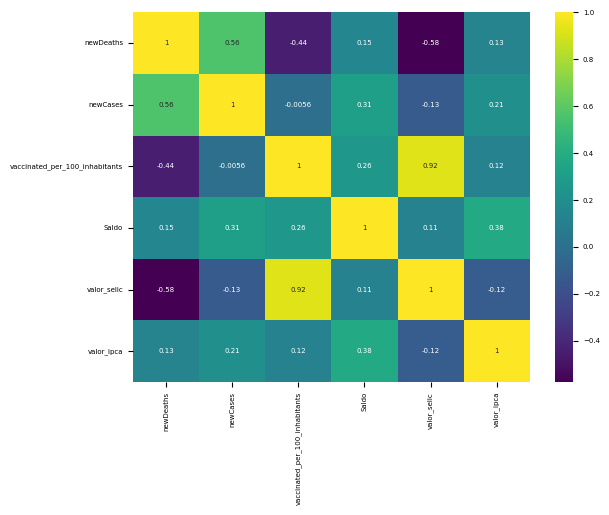

In [51]:
import seaborn as sns

sns.heatmap(df_merge.corr(), cmap='viridis', annot=True)